In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# IF TIME, PLEASE CLEAN THESE LOCS

In [2]:
records = pd.read_csv('../data/fucking_final_dataset.csv')
records = records[records.pub_year > 1499]
records = records[records.pub_year < 1600]

In [5]:
len(records)

15127

In [6]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,title_auth_slug,canonical_title,canonical_author,slug,canonical_city,canonical_country,full_text_slug
571,571,670,670,670,14321112,libro de proprietatibus rerum en romancehystor...,NaN,bartholomaeus,"gaspar de avila, a costa de joan thomas fabio",toledo,1529,NaN,NaN,libro de proprietatibus rerum en romancehystor...,libro de proprietatibus rerum en romancehystor...,bartholomaeus,"toledo,spain",toledo,spain,libro de proprietatibus rerum en romancehystor...


In [7]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

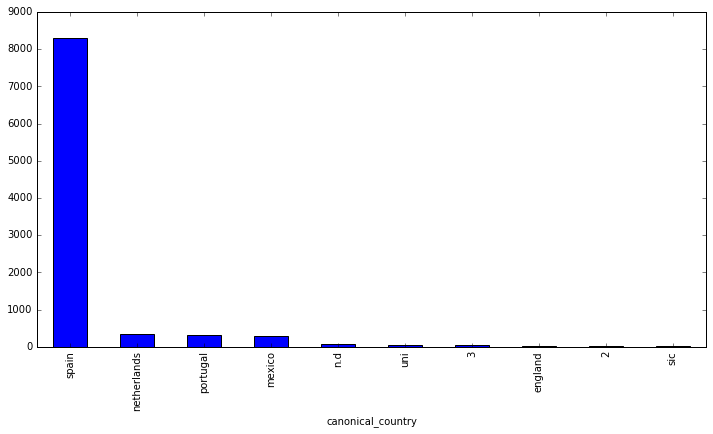

In [8]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

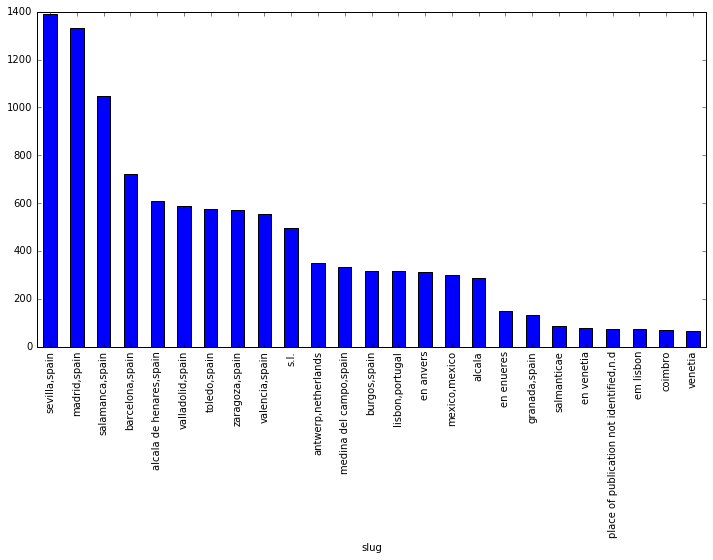

In [9]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

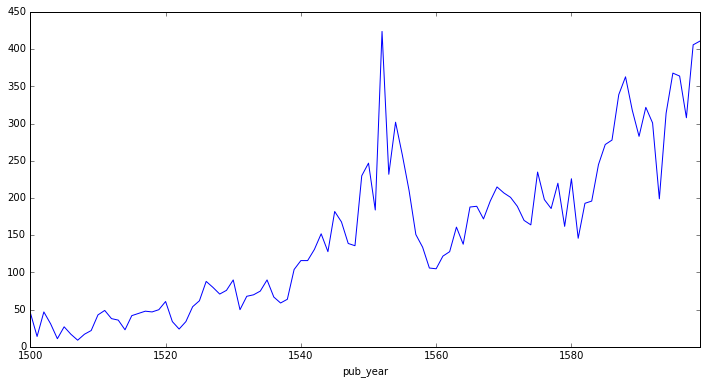

In [10]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [29]:
# records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [30]:
# records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [11]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index

In [12]:
top_producers = records[records.slug.isin(top_slugs)]
top_slugs

Index(['sevilla,spain', 'madrid,spain', 'salamanca,spain', 'barcelona,spain',
       'alcala de henares,spain', 'valladolid,spain', 'toledo,spain',
       'zaragoza,spain', 'valencia,spain', 's.l.'],
      dtype='object', name='slug')

In [13]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [22]:
top_producer_df = pd.DataFrame({
    'sevilla,spain': group_top_producers.ix['sevilla,spain'],
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'salamanca,spain': group_top_producers.ix['salamanca,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'valladolid,spain': group_top_producers.ix['valladolid,spain'],
    'alcala de henares,spain': group_top_producers.ix['alcala de henares,spain'],
#     'toledo,spain': group_top_producers.ix['toledo,spain'],
#     'zaragoza,spain': group_top_producers.ix['zaragoza,spain'],
#     'valencia,spain': group_top_producers.ix['valencia,spain'],
#     'antwerp,netherlands': group_top_producers.ix['antwerp,netherlands'],
}).fillna(0)

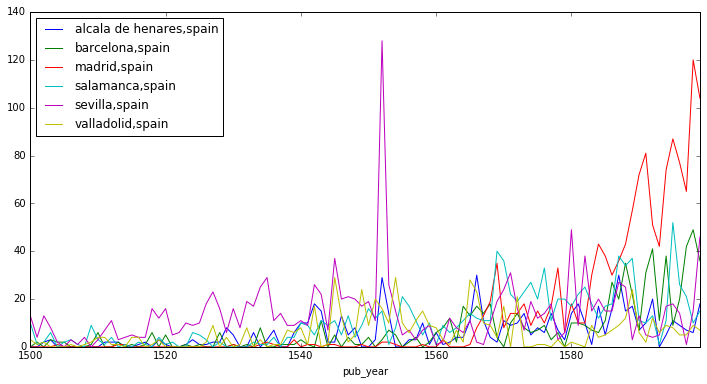

In [23]:
top_producer_df.plot()

In [24]:
top_producer_df

,"alcala de henares,spain","barcelona,spain","madrid,spain","salamanca,spain","sevilla,spain","valladolid,spain"
pub_year,,,,,,
1500,0,0,0,10,13,3
1501,0,2,0,1,4,1
1502,2,0,0,2,13,2
1503,3,3,0,6,8,0
1504,0,2,1,0,2,0
1505,0,2,0,2,0,0
1506,0,0,0,3,3,1
1507,0,0,0,1,1,0
1508,0,0,0,0,4,1


In [25]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [29]:
top_producer_df_percent = pd.DataFrame({
    'sevilla,spain': top_producer_df['sevilla,spain'].div(counted_by_year.values),
    'madrid,spain': top_producer_df['madrid,spain'].div(counted_by_year.values),
    'salamanca,spain': top_producer_df['salamanca,spain'].div(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].div(counted_by_year.values),
#     'valladolid,spain': top_producer_df['valladolid,spain'].div(counted_by_year.values),
    'alcala de henares,spain': top_producer_df['alcala de henares,spain'].div(counted_by_year.values),
#     'toledo,spain': top_producer_df['toledo,spain'].div(counted_by_year.values),
#     'zaragoza,spain': top_producer_df['zaragoza,spain'].div(counted_by_year.values),
#     'valencia,spain': top_producer_df['valencia,spain'].div(counted_by_year.values),
#     'antwerp,netherlands': top_producer_df['antwerp,netherlands'].div(counted_by_year.values),
})

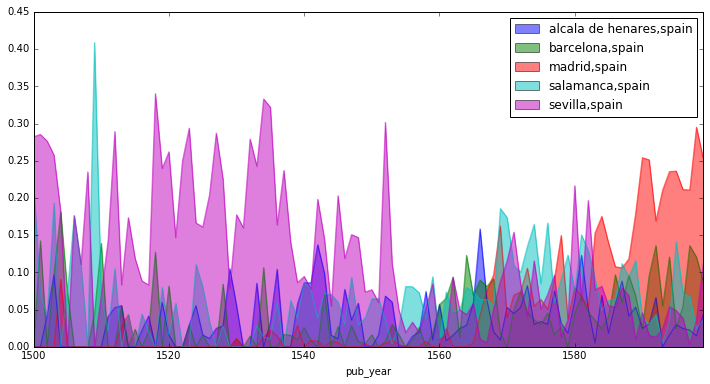

In [30]:
top_producer_df_percent.plot.area(stacked=False)